## import library

In [8]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as ss
from IPython.display import set_matplotlib_formats
import plotly.express as px

In [9]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [10]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Part 2. 파일 세팅

## 1. Stock Info

In [11]:
#코스피 지수 불러오기
ks_19 = fdr.DataReader('KS11', '2016-02-10', '2017-06-10')
ks_19.tail(60)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-03-13,2117.59,2102.37,2122.88,2100.91,382130000.0,0.0097
2017-03-14,2133.78,2127.12,2135.50,2124.42,365080000.0,0.0076
2017-03-15,2133.00,2128.42,2135.38,2127.26,374700000.0,-0.0004
2017-03-16,2150.08,2154.98,2156.85,2143.01,402420000.0,0.0080
2017-03-17,2164.58,2150.47,2164.59,2148.86,302790000.0,0.0067
2017-03-20,2157.01,2160.32,2160.57,2151.51,264950000.0,-0.0035
2017-03-21,2178.38,2162.95,2181.99,2160.25,303940000.0,0.0099
2017-03-22,2168.30,2159.97,2170.00,2158.96,394430000.0,-0.0046
2017-03-23,2172.72,2174.09,2182.42,2170.56,358610000.0,0.0020


In [12]:
#딕셔너리로 테마주 불러오기
moon_19 = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '신일산업': '002700',
    'DSR제강': '069730',
    'DSR': '155660'}

In [13]:
#테마주 종가 가져오기
item_list_ji_19 = []
for item_code in moon_19.values():
    close = fdr.DataReader(item_code, '2016-02-10', '2017-06-10')['Close']
    item_list_ji_19.append(close)

# Part3. 이동평균선 그리기

## 1. 테이블 정리

In [14]:
#테마주 종가 피벗테이블 만들기
ji_19 = pd.concat(item_list_ji_19,axis=1)
ji_19.columns = moon_19.keys()

ji_19["ks_19"] = ks_19["Close"]

ji_19_norm = (ji_19 - ji_19.min()) / (ji_19.max() - ji_19.min())
ji_19_norm

,우리들휴브레인,바른손,신일산업,DSR제강,DSR,ks_19
Date,,,,,,
2016-02-11,0.002614,0.008591,0.015936,0.011048,0.011781,0.048059
2016-02-12,0.001809,0.000000,0.007968,0.000000,0.000000,0.000000
2016-02-15,0.006232,0.001858,0.003984,0.000356,0.006930,0.049267
2016-02-16,0.006232,0.010139,0.000000,0.001426,0.008316,0.097033
2016-02-17,0.000000,0.007121,0.015936,0.003920,0.014207,0.089054
...,...,...,...,...,...,...
2017-06-02,0.044632,0.138080,0.593625,0.222381,0.217602,0.981754
2017-06-05,0.043325,0.129954,0.589641,0.213115,0.215523,0.976080
2017-06-07,0.041114,0.129954,0.585657,0.208125,0.209286,0.960561


## 2. 이동평균선 그리기

In [15]:
#60일 이동평균선 만들기 위해 데이터 60일 뒤로 미루기
ji_19_norm["우리들휴브레인_MA60"] = ji_19_norm["우리들휴브레인"].rolling(60).mean()
ji_19_norm["바른손_MA60"] = ji_19_norm["바른손"].rolling(60).mean()
ji_19_norm["신일산업_MA60"] = ji_19_norm["신일산업"].rolling(60).mean()
ji_19_norm["DSR제강_MA60"] = ji_19_norm["DSR제강"].rolling(60).mean()
ji_19_norm["DSR_MA60"] = ji_19_norm["DSR"].rolling(60).mean()
ji_19_norm["ks_19_MA60"] = ji_19_norm["ks_19"].rolling(60).mean()

In [16]:
# UpperB, LowerB 구해 볼린저 밴드 그리기
# UpperB = 종가의 이동평균 + (표준편차 * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)

ji_19_norm["우리들휴브레인_stddev"] = ji_19_norm["우리들휴브레인"].rolling(60).std()
ji_19_norm["바른손_stddev"] = ji_19_norm["바른손"].rolling(60).std()
ji_19_norm["신일산업_stddev"] = ji_19_norm["신일산업"].rolling(60).std()
ji_19_norm["DSR제강_stddev"] = ji_19_norm["DSR제강"].rolling(60).std()
ji_19_norm["DSR_stddev"] = ji_19_norm["DSR"].rolling(60).std()

ji_19_norm["ks_19_stddev"] = ji_19_norm["ks_19"].rolling(60).std()
ji_19_norm["코스피지수_볼린저밴드_상한선"] = ji_19_norm["ks_19_MA60"] + (ji_19_norm["ks_19_stddev"] * 2)
ji_19_norm["코스피지수_볼린저밴드_하한선"] = ji_19_norm["ks_19_MA60"] - (ji_19_norm["ks_19_stddev"] * 2)
ji_19_norm.tail(60)


,우리들휴브레인,바른손,신일산업,DSR제강,DSR,ks_19,우리들휴브레인_MA60,바른손_MA60,신일산업_MA60,DSR제강_MA60,DSR_MA60,ks_19_MA60,우리들휴브레인_stddev,바른손_stddev,신일산업_stddev,DSR제강_stddev,DSR_stddev,ks_19_stddev,코스피지수_볼린저밴드_상한선,코스피지수_볼린저밴드_하한선
Date,,,,,,,,,,,,,,,,,,,,
2017-03-13,0.617712,0.689164,0.657371,0.803991,0.681220,0.516663,0.706921,0.756437,0.629681,0.576039,0.443821,0.426070,0.057707,0.045718,0.142420,0.166442,0.095865,0.042587,0.511244,0.340896
2017-03-14,0.552473,0.638854,0.685259,0.746971,0.688150,0.546293,0.702960,0.753406,0.628088,0.582098,0.449076,0.429026,0.060009,0.047382,0.141230,0.165929,0.100441,0.044659,0.518344,0.339708
2017-03-15,0.534580,0.638854,0.693227,0.714897,0.667360,0.544866,0.698554,0.750052,0.624170,0.587622,0.454066,0.431965,0.062496,0.048256,0.135921,0.164716,0.103727,0.046379,0.524724,0.339206
2017-03-16,0.525633,0.631115,0.685259,0.714897,0.674290,0.576124,0.694146,0.746633,0.620053,0.593098,0.458651,0.435254,0.065197,0.049302,0.130045,0.163367,0.107279,0.049440,0.534134,0.336375
2017-03-17,0.502413,0.615635,0.661355,0.640057,0.639640,0.602661,0.689576,0.743279,0.615073,0.597434,0.462832,0.439103,0.068827,0.051249,0.122290,0.161048,0.109378,0.053252,0.545608,0.332599
2017-03-20,0.506031,0.619505,0.665339,0.722024,0.660430,0.588807,0.685066,0.739732,0.609495,0.602982,0.466990,0.442613,0.071826,0.052334,0.111601,0.159478,0.112081,0.056038,0.554690,0.330537
2017-03-21,0.523924,0.611765,0.625498,0.818247,0.708940,0.627917,0.681150,0.736120,0.603320,0.610074,0.471552,0.446896,0.074103,0.053569,0.099439,0.159431,0.116258,0.060138,0.567172,0.326621
2017-03-22,0.561419,0.619505,0.629482,0.910905,0.736660,0.609469,0.678307,0.733346,0.597344,0.619078,0.477374,0.450940,0.075380,0.055230,0.085759,0.160928,0.120634,0.062764,0.576467,0.325413
2017-03-23,0.600724,0.619505,0.621514,0.921597,0.715870,0.617558,0.676491,0.731347,0.591633,0.628392,0.482918,0.455113,0.075922,0.057143,0.071071,0.162011,0.123836,0.065369,0.585852,0.324375


# Part4. Visualize

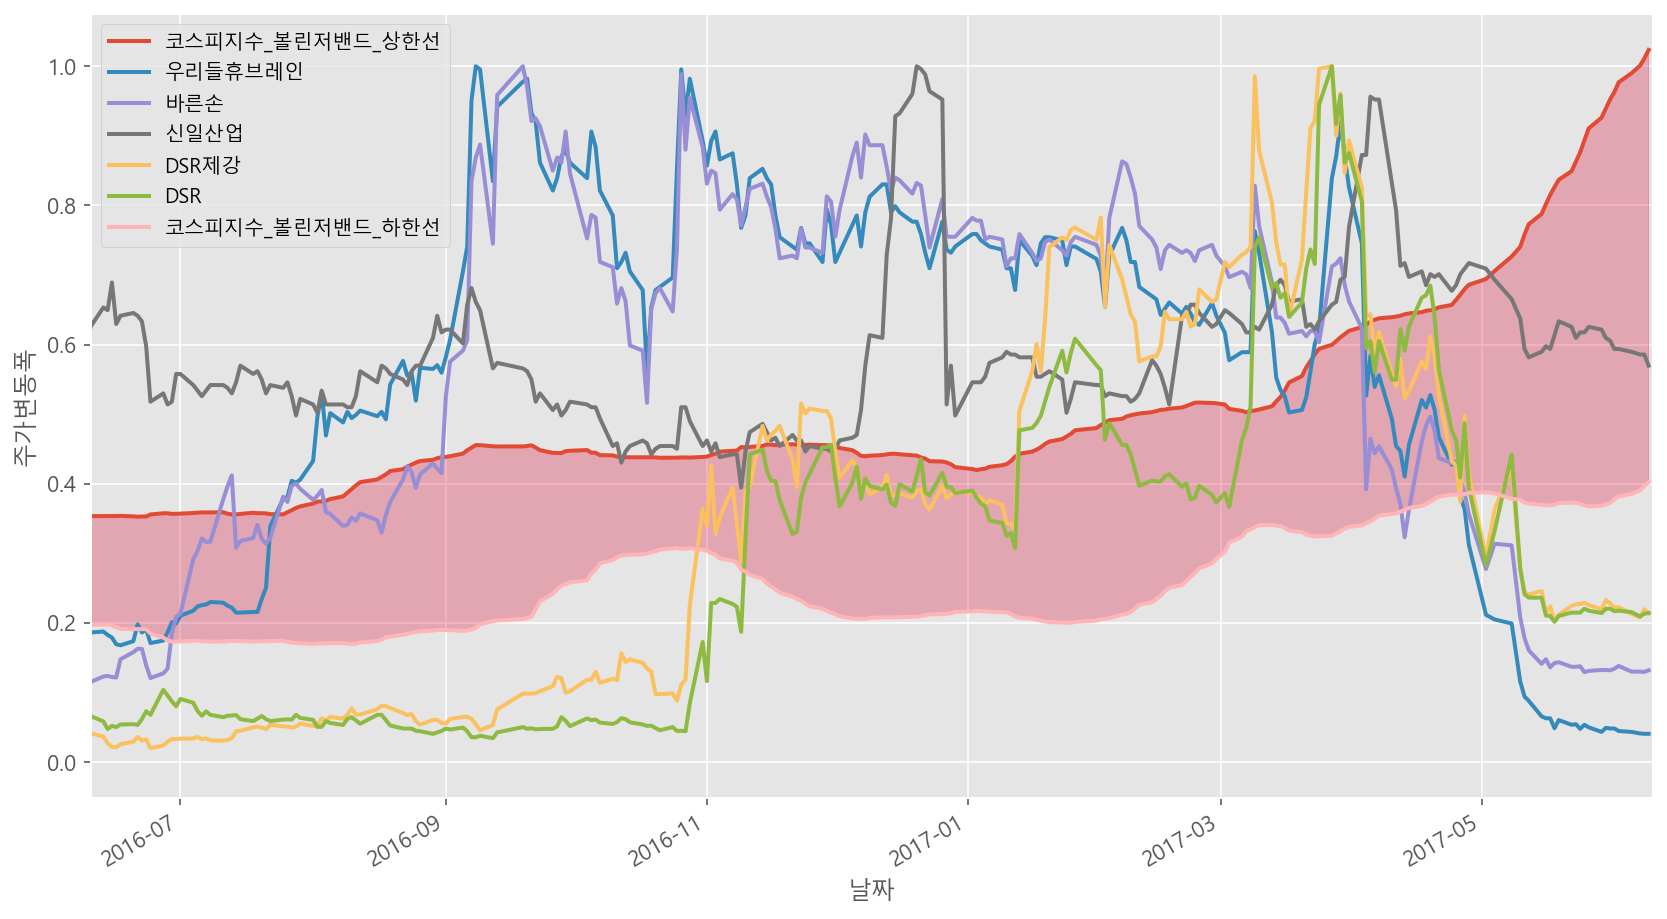

In [17]:
# 주가 기준
ji_19_norm.reset_index(inplace=True)
ji_19_norm['Date'] = pd.to_datetime(ji_19_norm['Date'])
ji_19_norm.set_index('Date', inplace=True)

ji_19_norm[["코스피지수_볼린저밴드_상한선", "우리들휴브레인", "바른손", "신일산업", "DSR제강","DSR", "코스피지수_볼린저밴드_하한선"]].plot(linewidth=2.0, figsize=(14, 8), xlabel='날짜', ylabel='주가변동폭')
plt.fill_between(ji_19_norm.index, ji_19_norm.코스피지수_볼린저밴드_하한선, ji_19_norm.코스피지수_볼린저밴드_상한선, alpha=0.3, color='crimson')
plt.rc('axes', labelsize=16)
plt.xlim('2016-06-10', '2017-06-10')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.rcParams['axes.facecolor'] = 'e5e5e5'
plt.show()